# Actividad 4
Usando Análisis Exploratorio de Datos.

In [2]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [18]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/Ferna45/Fisica-Computacional-1/master/Actividad-4/Base_de_Datos.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_BCS = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_Comondu = df_BCS.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_Comondu[cols] = pd.to_numeric(df_Comondu[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_Baja = df_Comondu.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_Baja['Fecha']=pd.to_datetime(df_Baja['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_Baja['Año'] = df_Baja['Fecha'].dt.year
df_Baja['Mes'] = df_Baja['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_Baja.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21633 entries, 0 to 21632
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21633 non-null  datetime64[ns]
 1   Precip  21582 non-null  float64       
 2   Evap    19448 non-null  float64       
 3   TMax    21576 non-null  float64       
 4   TMin    21588 non-null  float64       
 5   Año     21633 non-null  int64         
 6   Mes     21633 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1957-03-01     0.0   NaN  17.0  13.0  1957    3
1 1957-03-02     0.0   NaN  23.0   7.0  1957    3
2 1957-03-03     0.0   NaN  22.0   8.0  1957    3
3 1957-03-04     0.0   NaN  21.0   7.0  1957    3
4 1957-03-05     0.0   NaN  28.0  11.0  1957    3
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
21628 2017-12-27     0.0   2.4  32.0  12.0  2017   12
21629 2017-12-28   

In [19]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21633 entries, 0 to 21632
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21633 non-null  datetime64[ns]
 1   Precip  21582 non-null  float64       
 2   Evap    19448 non-null  float64       
 3   TMax    21576 non-null  float64       
 4   TMin    21588 non-null  float64       
 5   Año     21633 non-null  int64         
 6   Mes     21633 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1957-03-01     0.0   NaN  17.0  13.0  1957  Mar
1 1957-03-02     0.0   NaN  23.0   7.0  1957  Mar
2 1957-03-03     0.0   NaN  22.0   8.0  1957  Mar
3 1957-03-04     0.0   NaN  21.0   7.0  1957  Mar
4 1957-03-05     0.0   NaN  28.0  11.0  1957  Mar


# Análisis Exploratorio de Datos


**Visualización de datos**
Dentro de las acciones a realizar y comprender un conjunto de datos para visualizarlos con ayuda de la bibliotecas Python *Matplotlib, Seaborn y otras*.

In [5]:
# Forma y dimensiones del DataFrame
print(df_meteo.shape)

# Tipo de datos de las columnas
print(df_meteo.dtypes)

# Despliegue de renglones para visualizar la estructura del DataFrame
print(df_meteo.head())
print(df_meteo.tail())
print(df_meteo.sample(10))

# Información general de la estructura y componentes del DataFrame
print(df_meteo.info()) 

# Descripción estádistica de las variables numéricas
print(df_meteo.describe())

# Descripción estádistica de las variables categóricas
#df_meteo.describe(include='object')

# Suma de valores faltantes
df_meteo.isnull().sum()

(21633, 7)
Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Año                int64
Mes               object
dtype: object
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1957-03-01     0.0   NaN  17.0  13.0  1957  Mar
1 1957-03-02     0.0   NaN  23.0   7.0  1957  Mar
2 1957-03-03     0.0   NaN  22.0   8.0  1957  Mar
3 1957-03-04     0.0   NaN  21.0   7.0  1957  Mar
4 1957-03-05     0.0   NaN  28.0  11.0  1957  Mar
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
21628 2017-12-27     0.0   2.4  32.0  12.0  2017  Dec
21629 2017-12-28     0.0   4.1  31.6  12.5  2017  Dec
21630 2017-12-29     0.0   3.6  29.5  12.7  2017  Dec
21631 2017-12-30     0.0   2.6  25.0  12.0  2017  Dec
21632 2017-12-31     0.0   NaN  25.0  15.2  2017  Dec
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
8178  1980-10-01     0.0   6.4  35.0  20.5  1980  Oct
10291 1986-08-15     0.0   9.0  34.0  19.0  1986  Aug
461   1958-06-

Fecha        0
Precip      51
Evap      2185
Tmax        57
Tmin        45
Año          0
Mes          0
dtype: int64

**Histogramas de la Temperatura Máximas y Mínimas.**\
**Actividad 2** \
Crear Histogramas de las variables de **Precipitación, Evaporación, Temperaturas Máxima y Mínima** de el conjunto de datos que se están analizando (Función: sns.histplot()).\
Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())

**Precipitación**

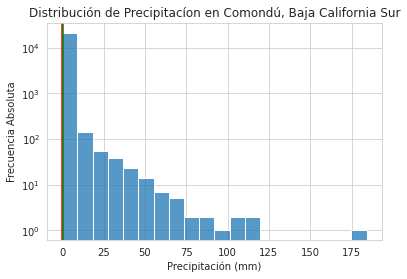

In [20]:
#Histograma con Seaborn de la precipitación.
sns.set_style("whitegrid")
#Nombre de los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitacíon en Comondú, Baja California Sur')

sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

# Definimos las cantidades: Promedio y Mediana
Pmed  = df_meteo.Precip.median()
Pprom = df_meteo.Precip.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Pmed, color = 'r');
plt.axvline(Pprom, color = 'g');

plt.show()

**Función de probabilidad de la precipitación**

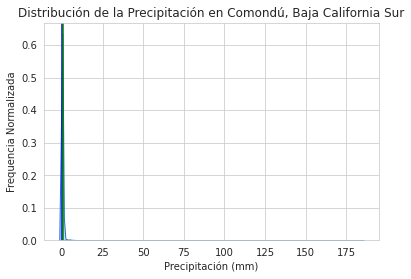

In [31]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Precip, fill=True);
plt.axvline(Pmed, color = 'b'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Comondú, Baja California Sur')

plt.show()

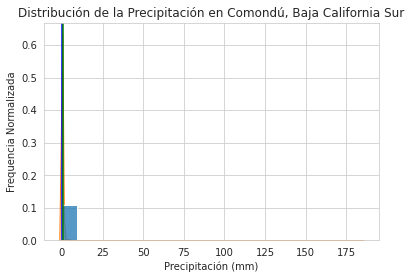

In [32]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Precip, fill=True);

plt.axvline(Pmed, color = 'b'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Comondú, Baja California Sur')

plt.show()


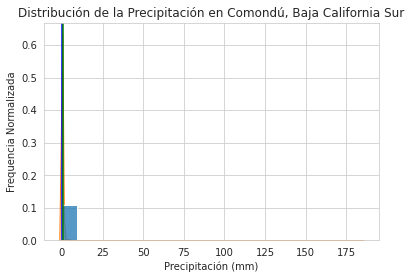

In [33]:
# Gráfica de la Precipitación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Precip, fill=True);

plt.axvline(Pmed, color = 'b'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Comondú, Baja California Sur')

plt.show()

In [34]:
print(Pmed)
print(Pprom)

0.0
0.44218330089889746


**Evaporación**

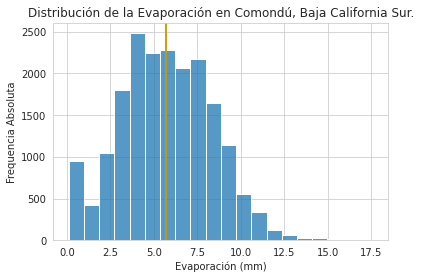

In [22]:
#Histograma con Seaborn de la Evaporación.
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Emed= df_meteo.Evap.median()
Eprom= df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x=Emed, color='r', label='m')
plt.axvline(x=Eprom, color='y', label='x')

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en Comondú, Baja California Sur.')

plt.show()

**Funcion de probabilidad de la Evaporación**

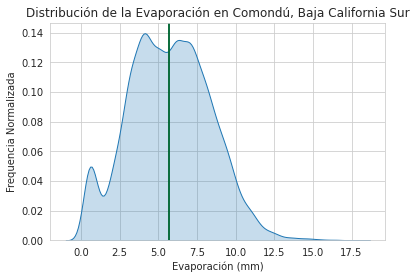

In [35]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Evap, fill=True);
plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Comondú, Baja California Sur')

plt.show()

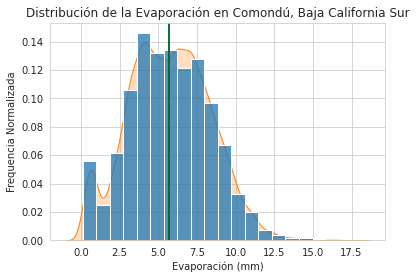

In [36]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Comondú, Baja California Sur')

plt.show()

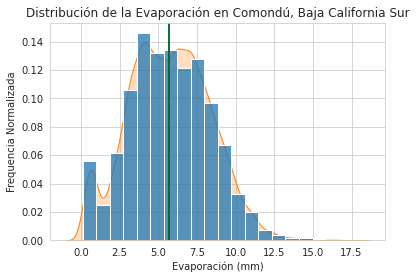

In [37]:
# Gráfica de la Evaporación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Comondú, Baja California Sur')

plt.show()

In [38]:
print(Emed)
print(Eprom)

5.7
5.70170711641302


**Temperatura Máxima**

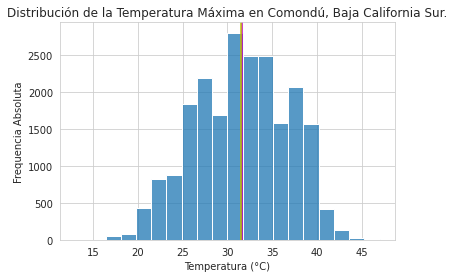

In [43]:
#Histograma con Seaborn de la Temperatura Máxima.
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_meteo.TMax.median()
Tprom= df_meteo.TMax.mean()

sns.histplot(data=df_meteo, x='TMax', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='m', label='m')
plt.axvline(x= Tprom, color='y', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Comondú, Baja California Sur.')

plt.show()

**Función de probabilidad de la Temperatura Máxima**

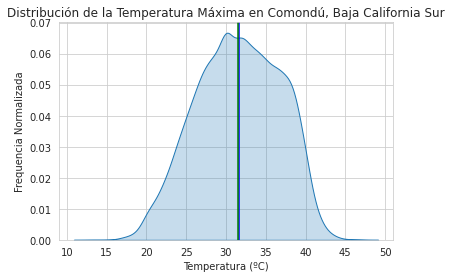

In [44]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.TMax, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Comondú, Baja California Sur')

plt.show()

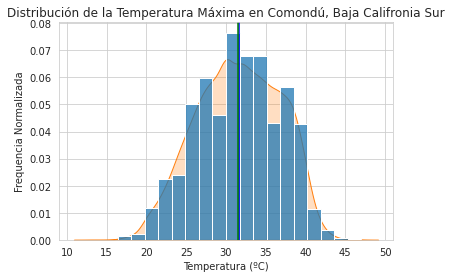

In [45]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='TMax', bins=20, stat='density');
sns.kdeplot(df_meteo.TMax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Comondú, Baja Califronia Sur')

plt.show()

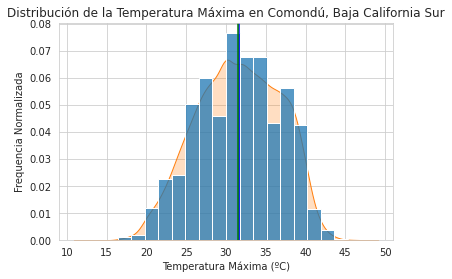

In [46]:
# Gráfica de la Temperatura Máxima y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.TMax.median() 
Tprom = df_meteo.TMax.mean()

sns.histplot(data=df_meteo, x='TMax', bins=20, stat='density');
sns.kdeplot(df_meteo.TMax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Comondú, Baja California Sur')

plt.show()


In [47]:
print(Tmed)
print(Tprom)

31.6
31.516768631812756


**Temperatura Mínima**

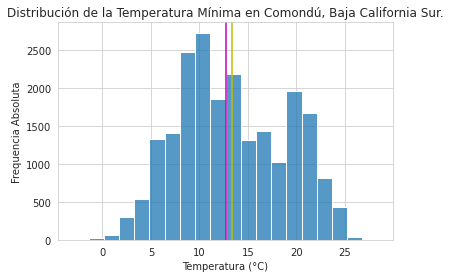

In [48]:
#Histograma con Seaborn de la Temperatura Mínima.
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_meteo.TMin.median()
Tprom= df_meteo.TMin.mean()

sns.histplot(data=df_meteo, x='TMin', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='m', label='m')
plt.axvline(x= Tprom, color='y', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Comondú, Baja California Sur.')

plt.show()

**Función de probabilidad de la Temperatura Mínima**

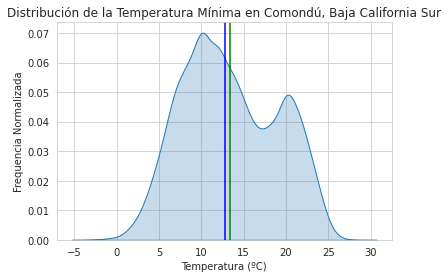

In [49]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.TMin, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Comondú, Baja California Sur')

plt.show()

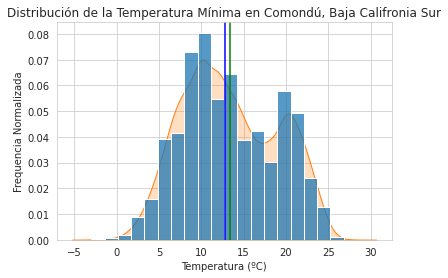

In [50]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='TMin', bins=20, stat='density');
sns.kdeplot(df_meteo.TMin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Comondú, Baja Califronia Sur')

plt.show()

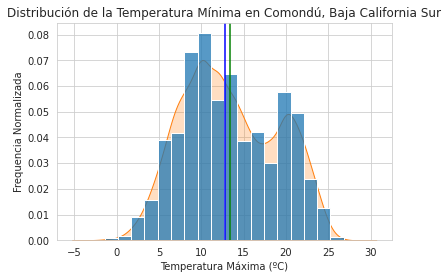

In [51]:
# Gráfica de la Temperatura Mínima y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.TMin.median() 
Tprom = df_meteo.TMin.mean()

sns.histplot(data=df_meteo, x='TMin', bins=20, stat='density');
sns.kdeplot(df_meteo.TMin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Comondú, Baja California Sur')

plt.show()

In [52]:
print(Tmed)
print(Tprom)

12.8
13.351181211784205


#**Actividad 3**.
 Crear las gráficas de cajas (Boxplot) para la *Evaporación*, *Temperaturas Máxima y Mínima* con **Función: sns.boxplot()**. 

**Evaporación**

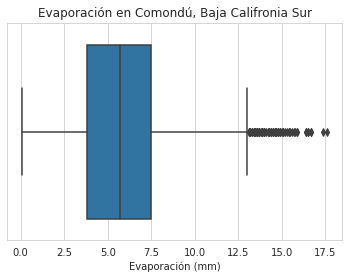

In [53]:
# Gráfica de caja para Evaporación utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(
    xlabel='Evaporación (mm)', title= 'Evaporación en Comondú, Baja Califronia Sur');

**Temperatura Máxima**

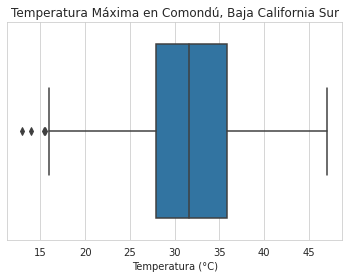

In [55]:
# Gráfica de caja para la Temperatura Máxima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.TMax, data=df_meteo, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Máxima en Comondú, Baja California Sur');

**Temperatura Mínima**

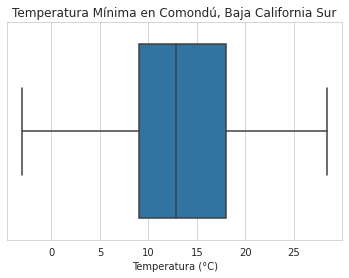

In [56]:
# Gráfica de caja para la Temperatura Mínima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.TMin, data=df_meteo, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Mínima en Comondú, Baja California Sur');

#Actividad 4
Hacer las gráficas de barras para la Precipitación agrupado por Años y después por meses con *Función: sns.barplot())*

In [62]:
# Seleccionaremos un conjunto de 20 datos en 20 años  
df_50 = df_meteo[(df_meteo['Año'] >= 1957) & (df_meteo['Año'] < 1977)]
df_70 = df_meteo[(df_meteo['Año'] >= 1977) & (df_meteo['Año'] < 1997)]
df_90 = df_meteo[(df_meteo['Año'] >= 1997) & (df_meteo['Año'] < 2018)]

**Precipitación promedio por año**

*1957-1976*

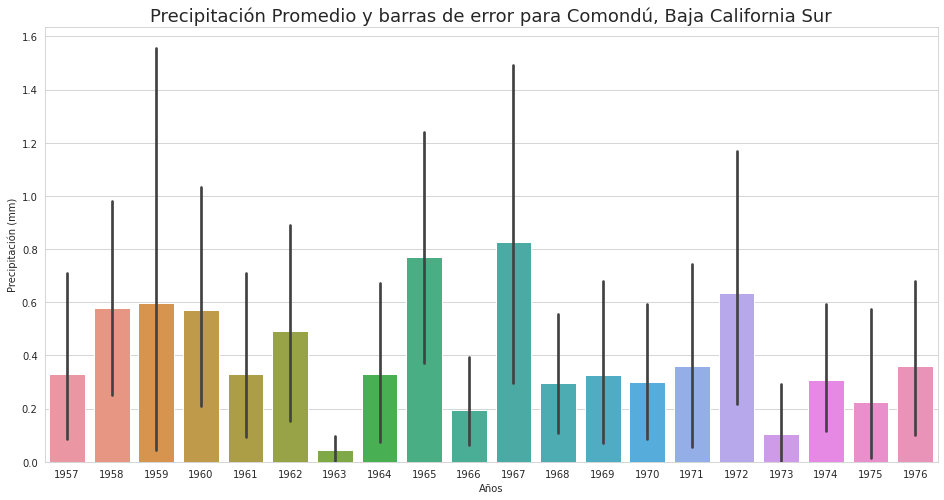

In [59]:
# Gráfica de Precipitación últimos 20 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_50);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

*1977-1996*

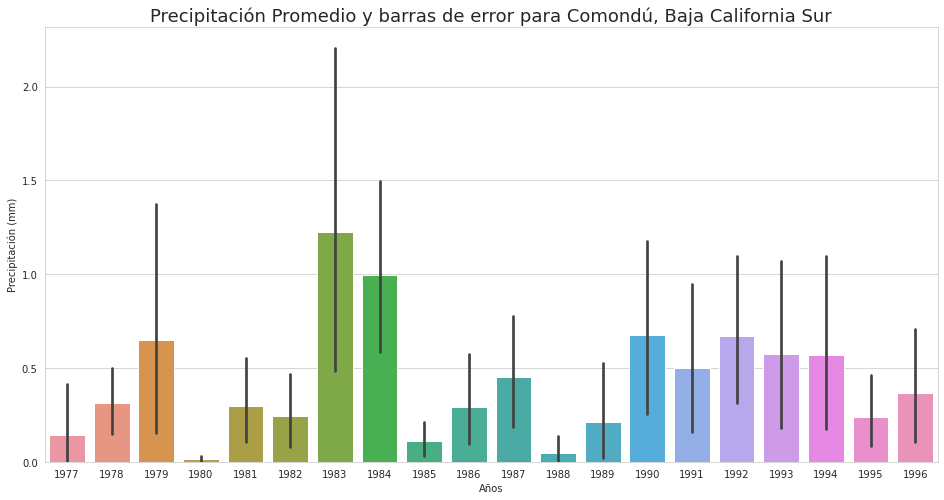

In [63]:
# Gráfica de Precipitación últimos 20 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_70);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

*1997-2017*

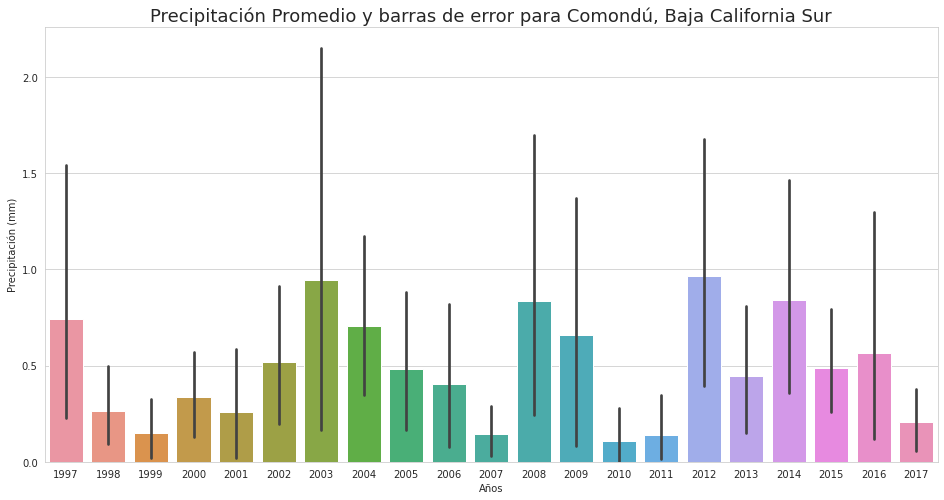

In [64]:
# Gráfica de Precipitación últimos 20 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

**Precipitación Promedio agrupado por Mes**

*1957-1976*

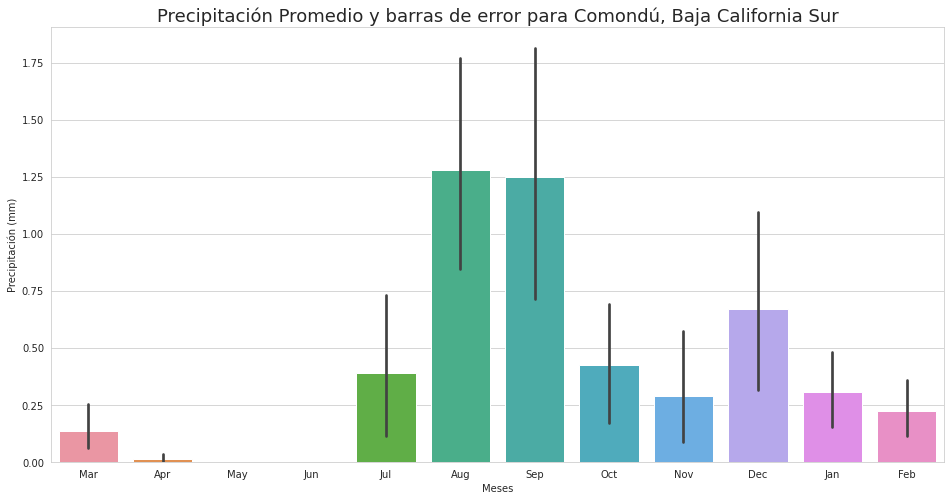

In [65]:
# Gráfica de Precipitación últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_50);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

*1977-1996*

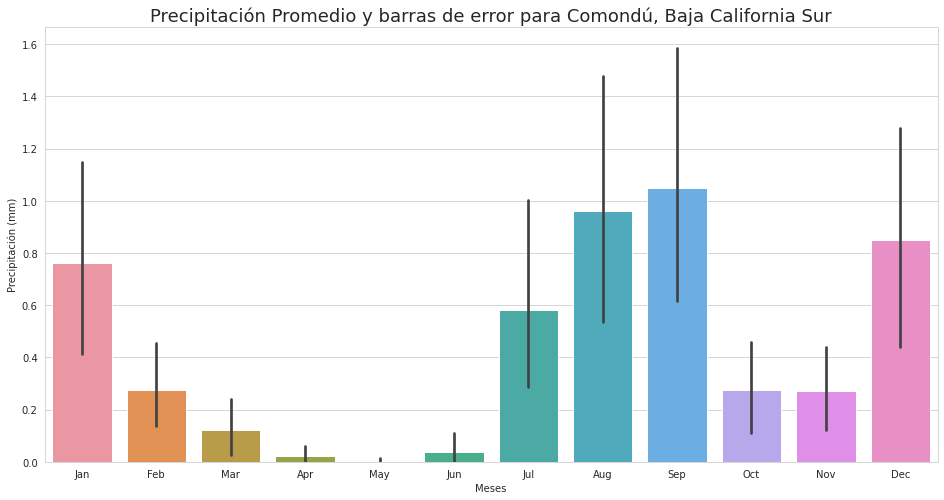

In [66]:
# Gráfica de Precipitación últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_70);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

*1997-2017*

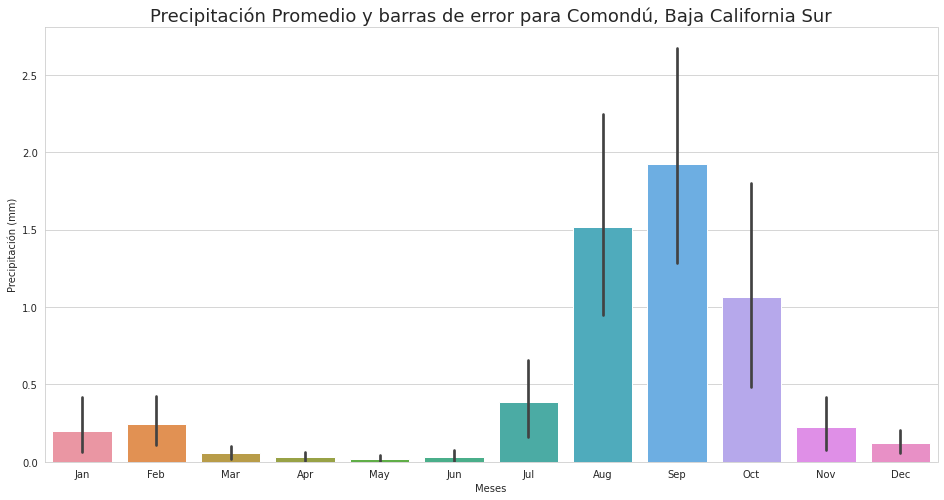

In [67]:
# Gráfica de Precipitación últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

#Actividad 5
Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). Con *(Función: sns.lineplot())*

*Para 40 años*

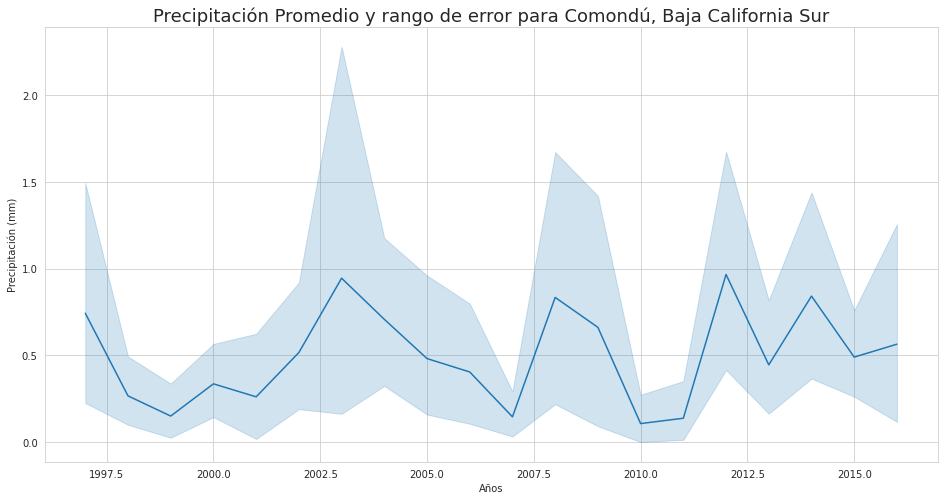

In [26]:
# Gráfica de Precipitación últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

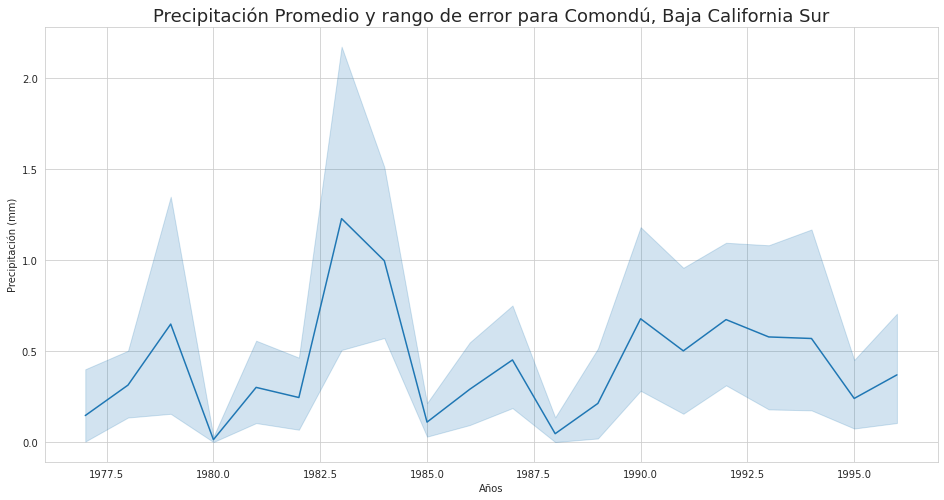

In [68]:
# Gráfica de Precipitación últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_70);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Comondú, Baja California Sur', fontsize=18)

plt.show()

**Temperatura Máxima y Mínima promedia por año**

*Para 40 años*

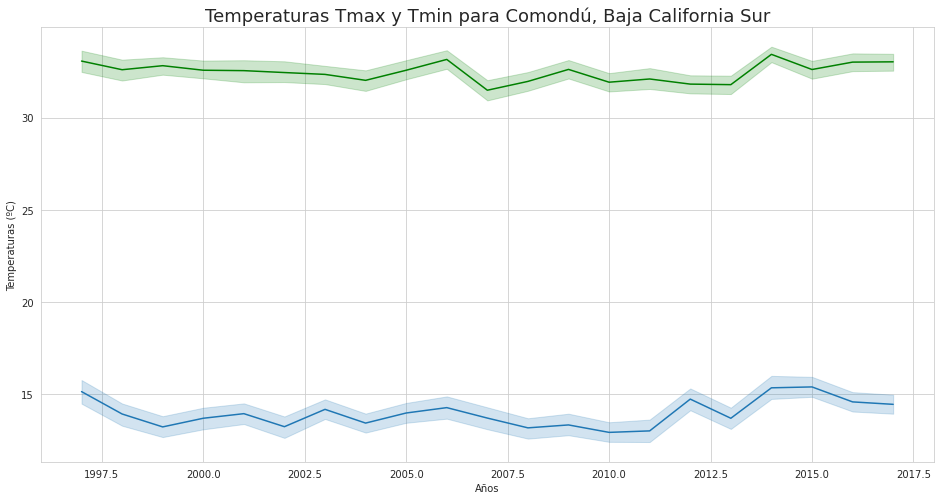

In [71]:
# Gráfica de Temperaturas de últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_90, color='g');
sns.lineplot(x='Año', y='TMin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Comondú, Baja California Sur', fontsize=18)

plt.show()

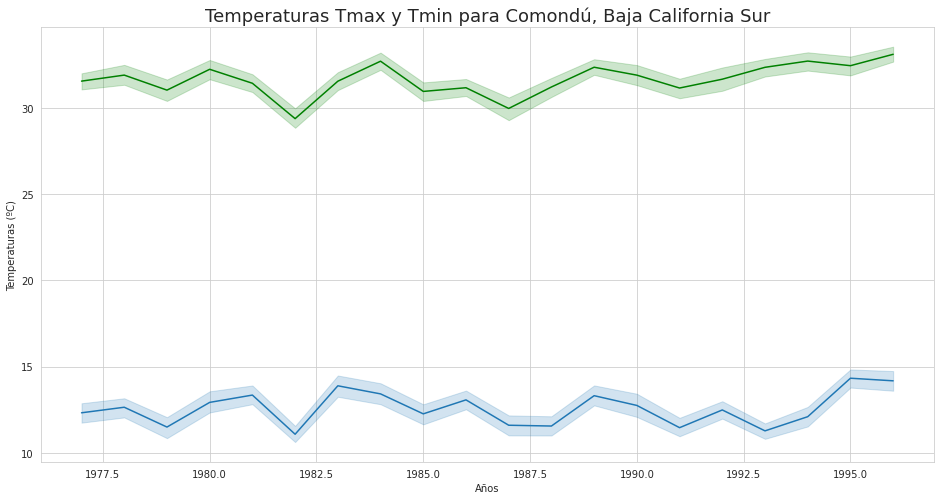

In [70]:
# Gráfica de Temperaturas de últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_70, color='g');
sns.lineplot(x='Año', y='TMin', data=df_70);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Comondú, Baja California Sur', fontsize=18)

plt.show()

#Actividad 6 
 Con el conjunto de 30 años de datos, produzca diagramas de cajas *(Función: sns.boxplot())* para observar la variabilidad de las **Temperaturas (Max y Tmin)** y la **Evaporación** agrupados por Mes.

*Para los últimos 40 años*

**Temperaturas Máximas y Mínimas**

Máxima para los últimos 40 años

*1997-2017*

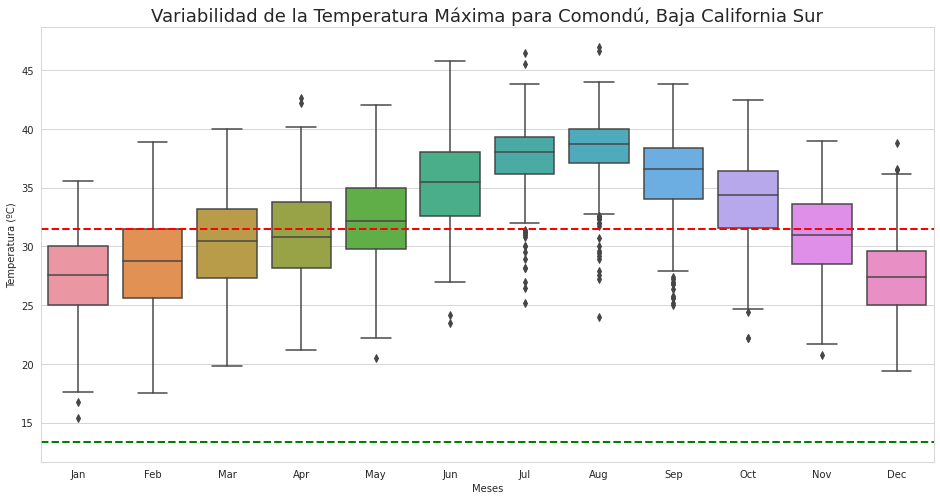

mean(Tmax) =  31.516768631812756
mean(Tmin) =  13.351181211784205
Diff Tmax_ave-Tmin_ave =  18.16558742002855


In [72]:
# Gráfica de Temepraturas Máximas en los últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Comondú, Baja California Sur', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

1977-1997

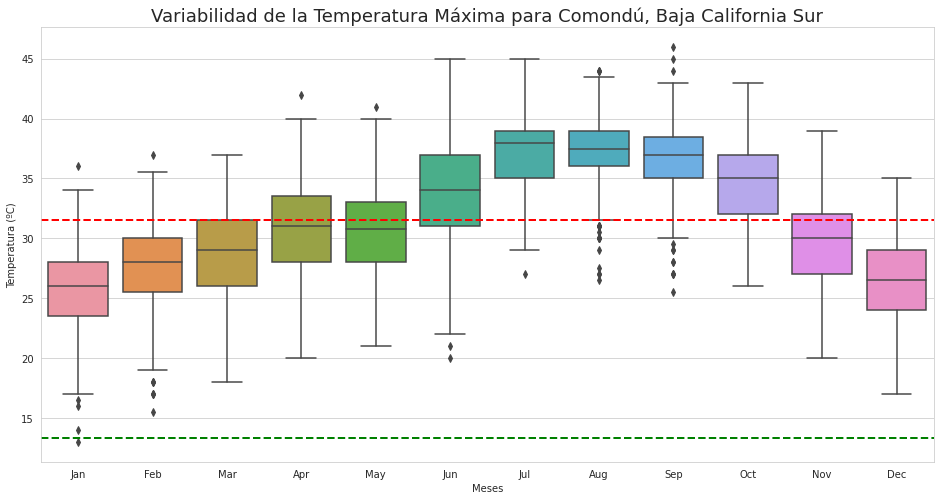

mean(Tmax) =  31.516768631812756
mean(Tmin) =  13.351181211784205
Diff Tmax_ave-Tmin_ave =  18.16558742002855


In [73]:
# Gráfica de Temepraturas Máximas en los últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_70);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Comondú, Baja California Sur', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

**Temperatura Mínima**\
1997-2017

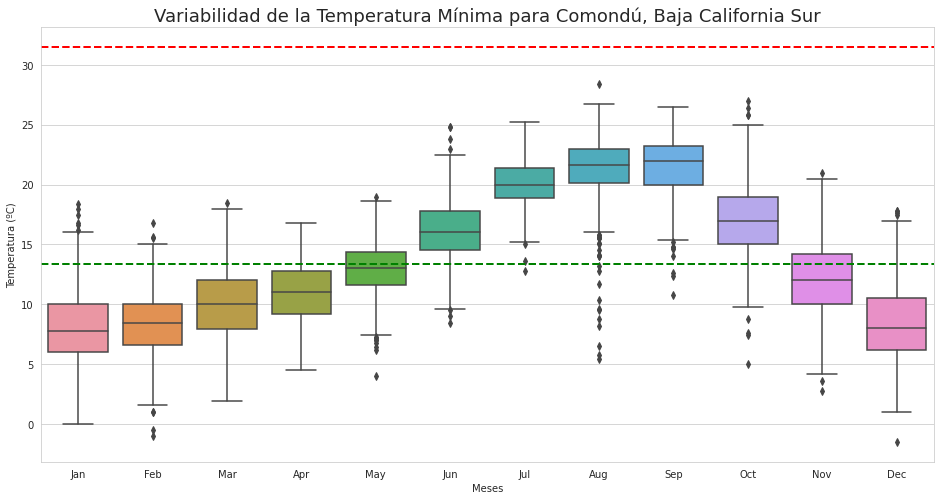

mean(Tmax) =  31.516768631812756
mean(Tmin) =  13.351181211784205
Diff Tmax_ave-Tmin_ave =  18.16558742002855


In [78]:
# Gráfica de Temperaturas Mínimas en los últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Comondú, Baja California Sur', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))


*1977-1997*

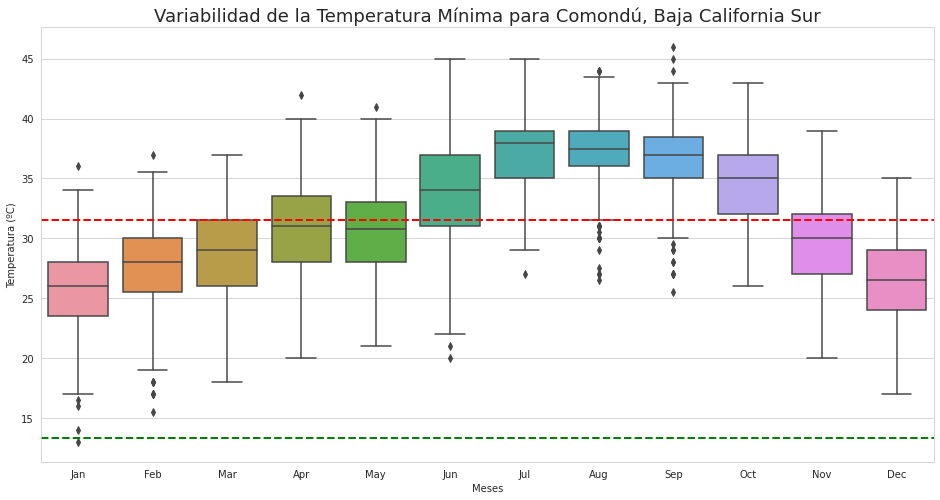

mean(Tmax) =  31.516768631812756
mean(Tmin) =  13.351181211784205
Diff Tmax_ave-Tmin_ave =  18.16558742002855


In [75]:
# Gráfica de Temepraturas Mínima en los últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_70);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Comondú, Baja California Sur', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

*Gráfica de **Boxplot** de la Precipitación por Mes*

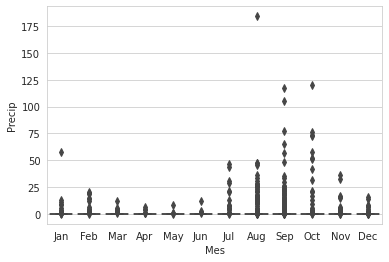

In [30]:
# La gráfica de Boxplot nos brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);


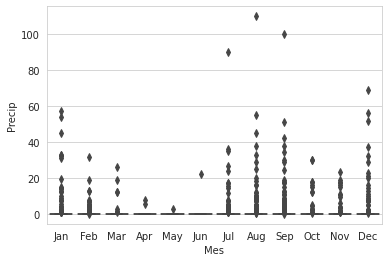

In [76]:
# La gráfica de Boxplot nos brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_70);